# Spotify Podcast Dataset - Publisher



In [197]:
import pandas as pd
import altair as alt
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
sns.set_style('darkgrid')

In [173]:
df = pd.read_csv('../../podcasts-no-audio-13GB-selected/metadata_with_episode_dates_and_category.tsv',sep='\t')
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d').reset_index(drop=True)
df = df[~df['release_date'].isna()]
df = df[~df['category'].isna()]

# Dataset is constrained to start_date and end_date
#start_date = pd.to_datetime("2019-01-01")
#end_date = pd.to_datetime("2020-03-01")

# Filter the DataFrame to include only rows between start_date and end_date
#df = df[(df.release_date >= start_date) & (df.release_date <= end_date)]

In [174]:
df.shape

(90873, 18)

In [175]:
df.columns

Index(['show_uri', 'show_name', 'show_description', 'publisher', 'language',
       'rss_link', 'episode_uri', 'episode_name', 'episode_description',
       'duration', 'show_filename_prefix', 'episode_filename_prefix',
       'release_date', 'first_dir', 'second_dir', 'category',
       'mean_show_duration', 'top_5'],
      dtype='object')

In [176]:
df['publisher'].unique()

array(['Katie Houle', 'Morning Cup Of Murder', 'Inside the 18 GK Media',
       ..., 'High Schooler ', 'Zach Valen', 'Chelsea Batalla'],
      dtype=object)

# Example Summary Stats

In [177]:
pub_df = df[df['publisher']=='Spotify Studios']

In [178]:
pub_df.shape

(1156, 18)

In [179]:
def create_stat1(current_df):
    """
    """
    df_num_shows = pd.DataFrame([current_df['show_filename_prefix'].unique().shape[0]],columns=["Number of Shows"])
    num_shows_text = alt.Chart(df_num_shows).mark_text(baseline="middle").encode(
        text="Number of Shows:Q",
    ).properties(
        title="Number of Shows",  # Add a title
    ).configure_text(
        fontSize=100,  # Adjust the font size
        font='Arial',  # Set the font type
    ).configure_title(
        fontSize=25,  # Adjust the title font size
        font='Arial',  # Set the title font type
    ).configure_view(
        stroke='transparent',  # Set the background color
    )
    return num_shows_text

#create_stat1(pub_df).to_dict()
create_stat1(pub_df)

alt.Chart(...)

In [180]:
def create_stat2(current_df):
    df_num_episodes = pd.DataFrame([current_df['episode_filename_prefix'].unique().shape[0]],columns=["Number of Total Episodes"])
    num_episodes_text = alt.Chart(df_num_episodes).mark_text(baseline="middle").encode(
        text="Number of Total Episodes:Q",
    ).properties(
        title="Number of Total Episodes",  # Add a title
    ).configure_text(
        fontSize=100,  # Adjust the font size
        font='Arial',  # Set the font type
    ).configure_title(
        fontSize=25,  # Adjust the title font size
        font='Arial',  # Set the title font type
    ).configure_view(
        stroke='transparent',  # Set the background color
    )
    return num_episodes_text
#create_stat2(pub_df).to_dict()
create_stat2(pub_df)

alt.Chart(...)

In [181]:
def create_stat3(current_df):
    df_episodes_per_show = pd.DataFrame([current_df.groupby('show_filename_prefix').size().mean()],columns=["Episodes Per Show"])
    episodes_per_show_text = alt.Chart(df_episodes_per_show).mark_text(baseline="middle").encode(
        text=alt.Text('Episodes Per Show:Q', format='.1f'),
    ).properties(
        title="Episodes Per Show",  # Add a title
    ).configure_text(
        fontSize=100,  # Adjust the font size
        font='Arial',  # Set the font type
    ).configure_title(
        fontSize=25,  # Adjust the title font size
        font='Arial',  # Set the title font type
    ).configure_view(
        stroke='transparent',  # Set the background color
    )
    return episodes_per_show_text

#create_stat3(pub_df).to_dict()
create_stat3(pub_df)

alt.Chart(...)

In [195]:
def create_chart1(current_df):
    # First group by show name AND aggregate time by month AND THEN get the counts which will give you the episodes per month by show for every month.
    # then take the average over all months to get the average episodes per month by show. 
    monthly_counts = current_df[['show_name','release_date']].groupby(['show_name',current_df.release_date.dt.to_period("M")]).agg('count') \
        .groupby('show_name').mean().sort_values(by='release_date',ascending=False)
    monthly_counts = monthly_counts.reset_index()
    
    # Reset the index to have 'Date' as a column again
    monthly_counts['episodes_per_month'] = monthly_counts['release_date']
    monthly_counts.drop('release_date',axis=1,inplace=True)
    
    # bar chart of number of shows, number of episodes, number of episodes per show
    shows_monthly_barchart = alt.Chart(monthly_counts).mark_bar().encode(
        x=alt.X('episodes_per_month:Q', axis=alt.Axis(title='Episodes per Month')),  # Quantitative scale for the y-axis
        y=alt.Y('show_name:N', axis=alt.Axis(title='')).sort('-x')
    ).configure_scale(
        bandPaddingInner=0.2,
    ).properties(
        title="Show Name",  # Add a title
    )
    return shows_monthly_barchart

create_chart1(pub_df)

alt.Chart(...)

In [236]:
def create_chart2(current_df):
    df_show2episodes = current_df.groupby(['show_name']).size().sort_values(ascending=False).reset_index()
    df_show2episodes = df_show2episodes.rename(columns={0: 'num_episodes'})
    
    # bar chart of number of shows, number of episodes, number of episodes per show
    episodes_barchart = alt.Chart(df_show2episodes).mark_bar().encode(
        x=alt.X('num_episodes:Q', axis=alt.Axis(title='Total Episodes by Show')),  # Quantitative scale for the y-axis
        y=alt.Y('show_name:N', axis=alt.Axis(title='')).sort('-x')
    ).configure_scale(
        bandPaddingInner=0.2,
    ).properties(
        title="Show Name",  # Add a title
    )
    return episodes_barchart

create_chart2(pub_df)

alt.Chart(...)

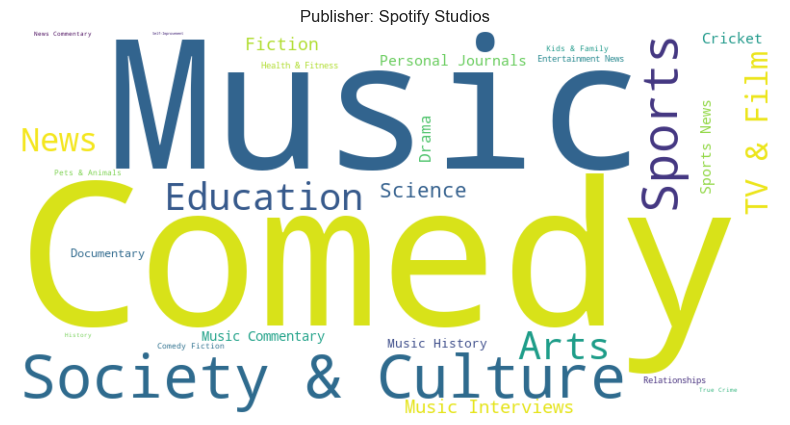

In [210]:
plotting = True

category_raw_counts = []
for i,val in pub_df['category'].items():
   category_raw_counts.extend(val.split(','))
len(category_raw_counts)

category_counts = Counter(category_raw_counts)
sorted_counts = dict(sorted(category_counts.items(), key=lambda item: item[1], reverse=True))
values, frequencies = zip(*sorted_counts.items())

# Generate the word cloud with the specified font
wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(sorted_counts)

if plotting:
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Publisher: {pub_df['publisher'].unique()[0]}")
    plt.show()

else:
    filename = '_'.join(pub_df['publisher'].unique()[0].split())+'.png'
    # Save the word cloud image to a file
    wc.to_file(filename)
    
    # Create a Vega-Lite specification with the image URL
    vega_lite_spec = {
        "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
        "data": {"values": [{"image": filename}]},
        "vconcat": [
            {
                "width": 800,
                "height": 400,
                "mark": {"type": "image", "clip": False},
                "encoding": {"url": {"field": "image", "type": "nominal"}},
            },
        ],
    }
    
    # Create an Altair chart using the Vega-Lite specification
    altair_chart = alt.Chart().from_dict(vega_lite_spec)


In [250]:
def create_chart3(current_df):
    # Function to split the string in category and create a new DataFrame
    def process_row(row):
        split_values = row['category'].split(',')
        new_df = pd.DataFrame({'category': split_values, 'show_uri': row['show_uri']})
        return new_df
    
    result_df = pd.concat(current_df.apply(process_row, axis=1).tolist(), ignore_index=True)
    result_df2 = result_df.groupby('category').nunique().sort_values(by='show_uri',ascending=True)
    result_df2['Frequency'] = result_df2['show_uri']
    result_df2 = result_df2.reset_index()
    
    categories_bar_chart = alt.Chart(result_df2).mark_bar().encode(
        x=alt.X('Frequency:Q'),  # Quantitative scale for the y-axis
        y=alt.Y('category:N', axis=alt.Axis(title='')).sort('-x'),
        text='category:N'  # Display the 'label' values as text
    ).configure_scale(
        bandPaddingInner=0.2,
    ).properties(
        title='Podcast Show Categories',
    ).configure_axisY(
        titleAlign='left',  # Align the title to the left
        titleAnchor='end',  # Set the title anchor to the end
        labelAlign='right',  # Align the labels to the right
    )
    
    return categories_bar_chart

create_chart3(pub_df)

alt.Chart(...)

## Generate json for one publisher

In [182]:
viz = {
    'stat1': create_stat1(pub_df).to_dict(),
    'stat2': create_stat2(pub_df).to_dict(),
    'stat3': create_stat3(pub_df).to_dict(),
    'chart1': create_chart1(pub_df).to_dict(),
    'chart2': create_chart2(pub_df).to_dict(),
    'chart3': create_chart3(pub_df).to_dict()

}

# Specify the file path
file_path = 'viz.json'

# Write the dictionary to a JSON file
with open(file_path, 'w') as json_file:
    json.dump(my_dict, json_file)

## Generate json for N publisher

In [252]:
publishers = {}
for group_name, group_df in df.sample(10000).groupby('publisher'):
    publishers[group_name] = {
        'stat1': create_stat1(group_df).to_dict(),
        'stat2': create_stat2(group_df).to_dict(),
        'stat3': create_stat3(group_df).to_dict(),
        'chart1': create_chart1(group_df).to_dict(),
        'chart2': create_chart2(group_df).to_dict(),
        'chart3': create_chart3(group_df).to_dict()

    }

# Specify the file path
file_path = '../visualization_data/publisher/publisher.json'

# Write the dictionary to a JSON file
with open(file_path, 'w') as json_file:
    json.dump(publishers, json_file)